LSTM networks

(200, 1)


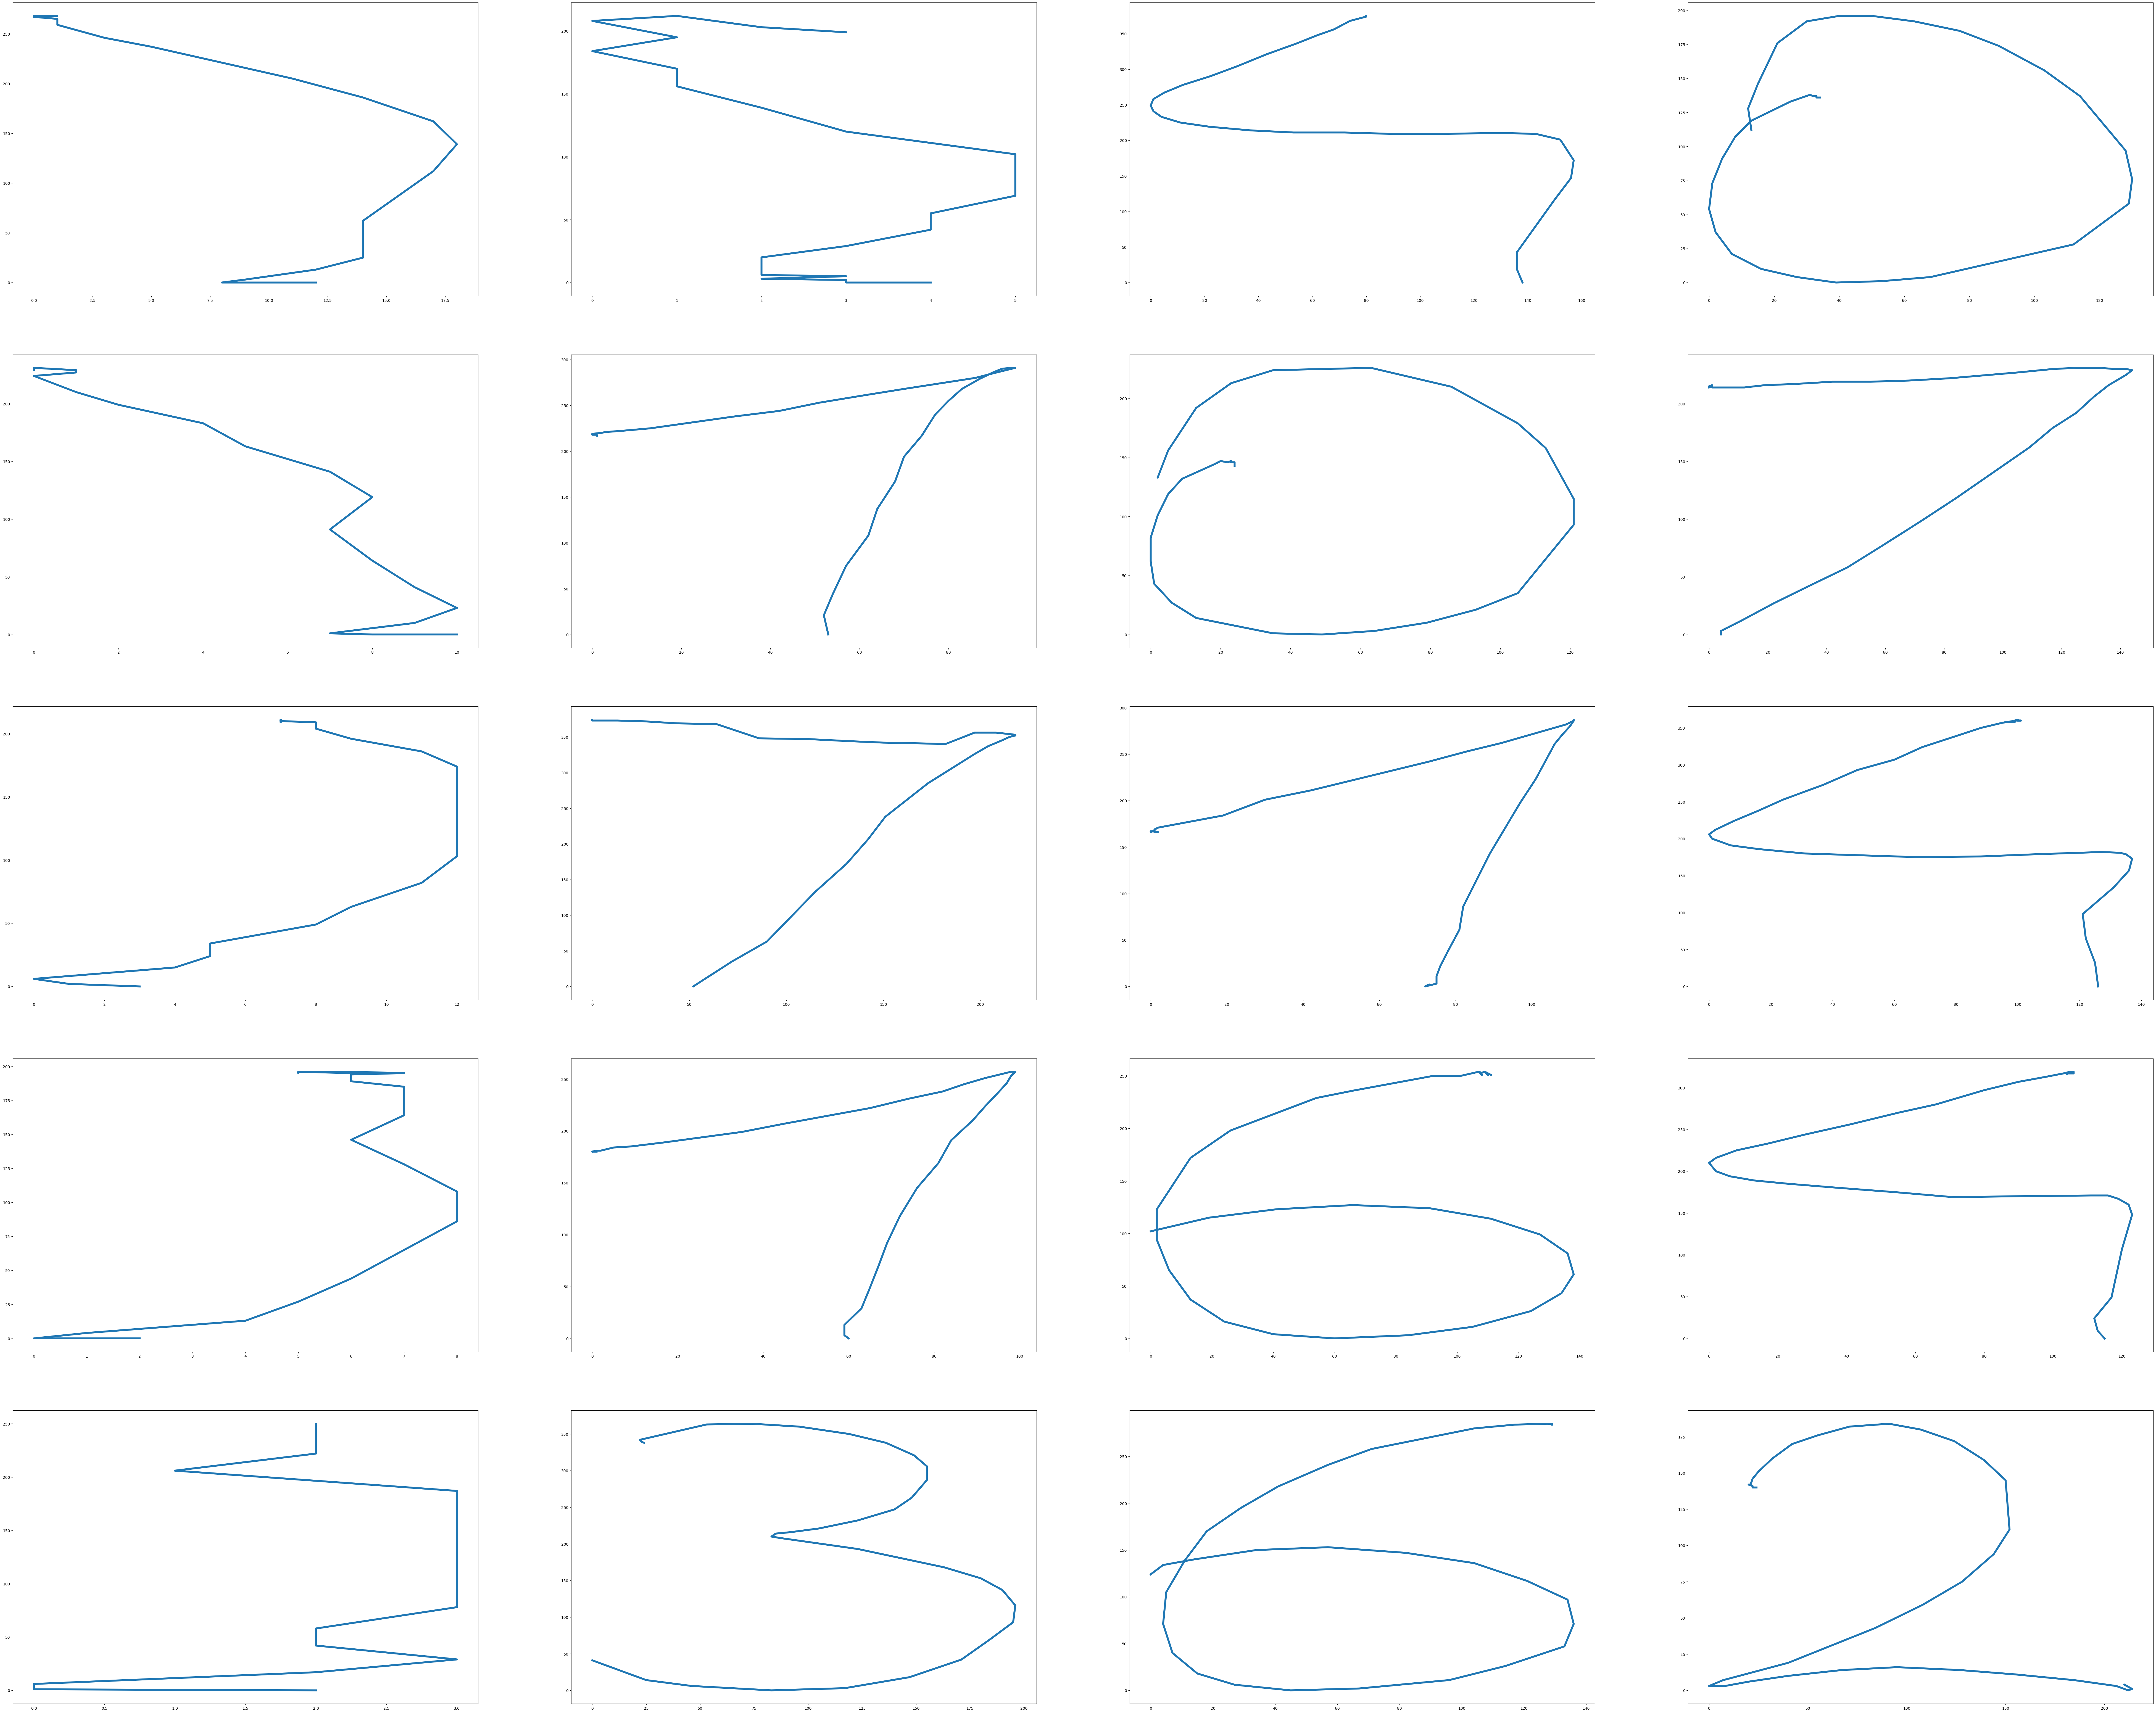

In [56]:
# Load data
import os
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np

def load_mat_files_from_folder(folder_path):
    mat_data = {}
    ytrain_data = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.mat'):
            file_path = os.path.join(folder_path, filename)
            mat_data[filename] = loadmat(file_path)
            mat_data = mat_data['DynCislaData_Python.mat']
            
    return mat_data

folder_path = './'
data = load_mat_files_from_folder(folder_path)
# print(data['XTrain'])
XtrainArr = data['XTrain']
print(XtrainArr.shape)
NumOfPrints = 0
NumOfPrintsRow = 0
fig, axes = plt.subplots(5, 4, figsize=(5 * 20, 4*20)) 
for i in XtrainArr:
    data = i[0]
    xpoints, ypoints = data[0], data[1]
    axes[NumOfPrints%5,NumOfPrintsRow].plot(xpoints,ypoints,linewidth=5)
    NumOfPrints+=1
    if NumOfPrints%5 == 0:
        NumOfPrintsRow+=1
    if NumOfPrints>19:
        break
plt.show()    


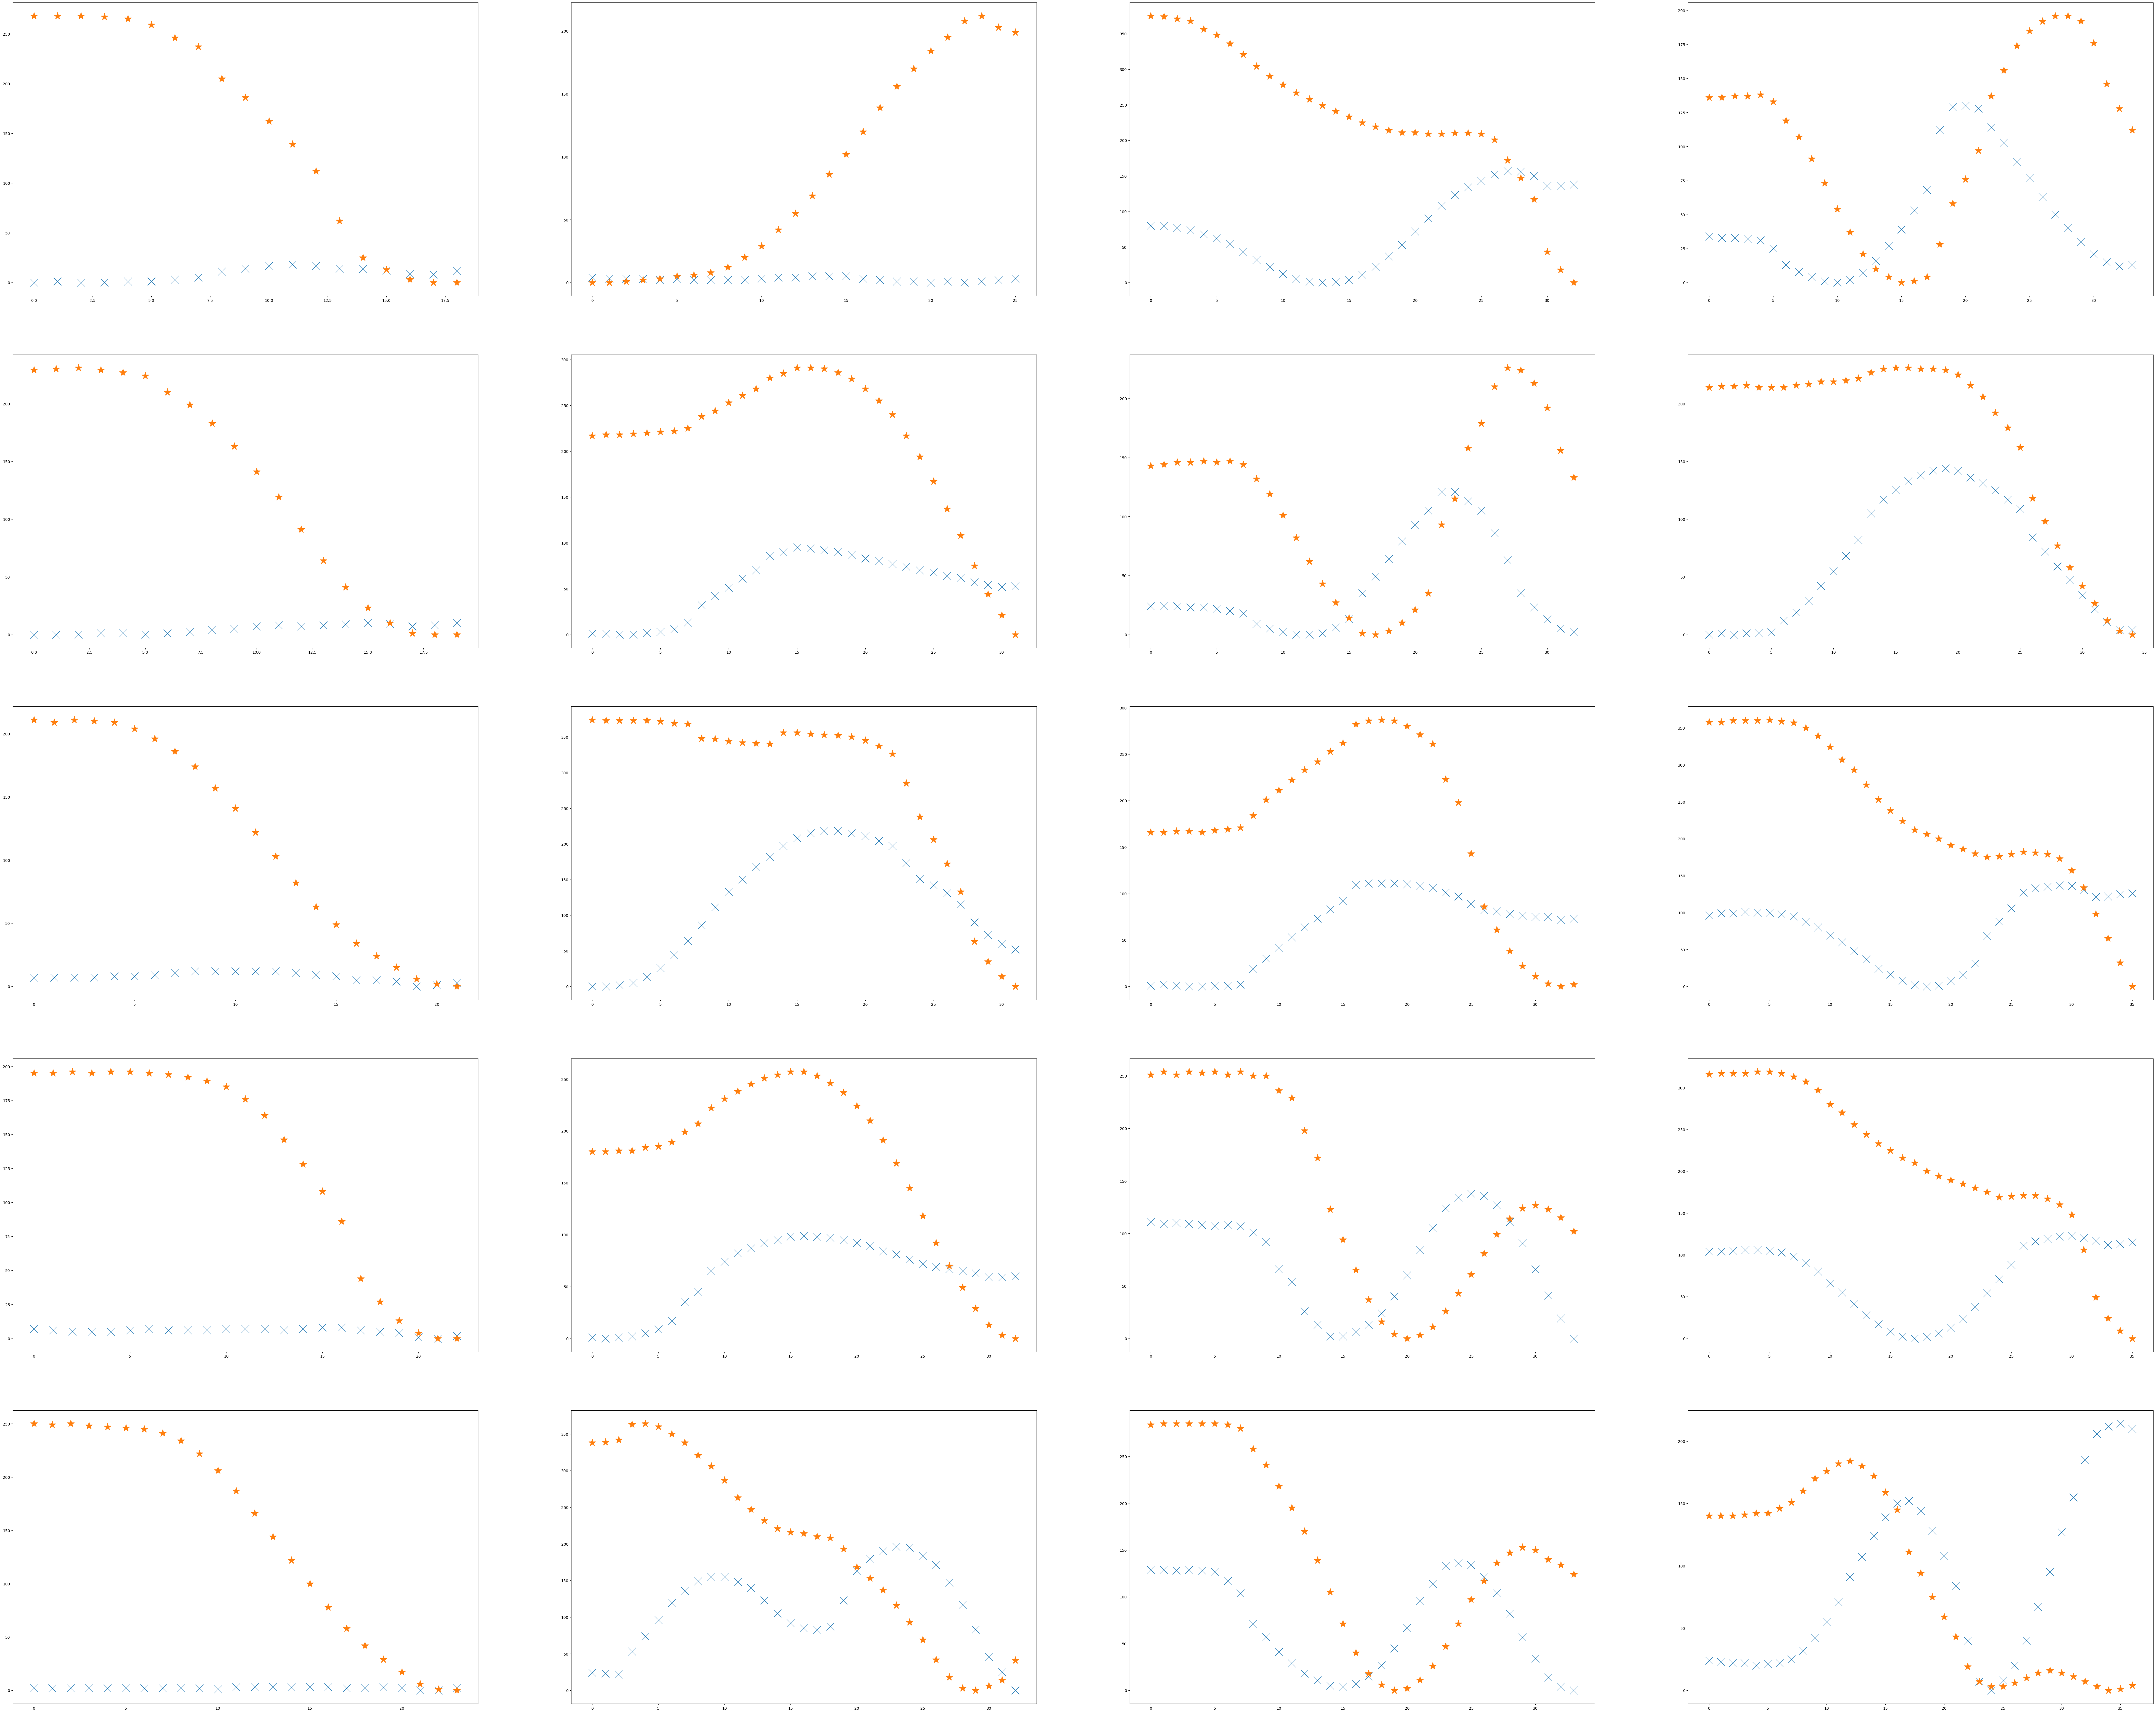

In [65]:
NumOfPrints = 0
NumOfPrintsRow = 0
fig, axes = plt.subplots(5, 4, figsize=(5 * 20, 4*20)) 
for i in XtrainArr:
    data = i[0]
    xpoints, ypoints = data[0], data[1]
    axes[NumOfPrints%5,NumOfPrintsRow].plot(range(0,len(xpoints)),xpoints,marker="x",linestyle=' ',markersize=20)
    axes[NumOfPrints%5,NumOfPrintsRow].plot(range(0,len(ypoints)),ypoints,marker="*",linestyle=' ',markersize=20)
    NumOfPrints+=1
    if NumOfPrints%5 == 0:
        NumOfPrintsRow+=1
    if NumOfPrints>19:
        break
plt.show()  

In [55]:
import numpy as np

def resize_arrays(data, target_length=50):
    # Iterate over each item in `data`
    data1 = data
    for i, sublist in enumerate(data):
        for j, arr in enumerate(sublist[0]):
            # Create a new array of length `target_length` to store the resized data
            new_arr = np.zeros(target_length, dtype=arr.dtype)

            # If the array is shorter than target_length, copy original elements and leave the rest as zero
            if arr.size < target_length:
                new_arr[:arr.size] = arr
            
            # If the array is longer than target_length, apply trimming
            elif arr.size > target_length:
                # Check for repeated values at the start
                if np.all(arr[:target_length] == arr[0]):
                    new_arr = arr[:target_length]  # Take the first 50 elements
                # Check for repeated values at the end
                elif np.all(arr[-target_length:] == arr[-1]):
                    new_arr = arr[-target_length:]  # Take the last 50 elements
                else:
                    new_arr = arr[:target_length]  # Default: Trim to first 50 elements if no pattern found

            else:
                new_arr = arr

            data1[i][0][j] = new_arr
    data=data1
    return data


resized_data = resize_arrays(data)
print(resized_data)

[[[array([ 0,  0,  0,  1,  1,  3,  5, 11, 14, 17, 18, 17, 14, 14, 12,  9,  8,
       12,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=uint16), array([268, 267, 265, 259, 246, 237, 205, 186, 162, 139, 112,  62,  25,
        13,   3,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
      dtype=uint16)]], [[array([ 0,  1,  1,  2,  4,  5,  7,  8,  7,  8,  9, 10,  9,  7,  8, 10,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=uint8), array([229, 224, 210, 199, 183, 163, 141, 119,  91,  64,  41,  23,  10,
         1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [48]:


for i in XtrainArr:
    data1=[0,1]
    data = i[0]
    # print(len(data[0]))
    
    if len(data[0])<50:
        arrayx = data[0]
        # print(arrayx)
        wantedPlus = 50 - len(data[0])
        data1[0] = arrayx
        for x in range(wantedPlus):
            data1[0] = np.append(arrayx[0], data1[0])
        arrayy = data[1]
        data1[1] = arrayy
        for x in range(wantedPlus):
            data1[1] = np.append(arrayy[0], data1[1])
        # print(len(data1))
        # print(data1)
        i[0] = data1
        # print("-----")
    if len(data[0])>50:
        arrayx = data[0]
        print(arrayx)
        temp=3000
        data1[0] = arrayx
        for x in data1[0][:]:  
            if temp == x:
                data1[0].remove(x)
            temp=x  
        arrayy = data[1]
        temp=3000
        data1[1] = arrayy
        for x in data1[1][:]:  
            if temp == x:
                data1[1].remove(x)
            temp=x
        print(len(data1))
        print(data1)
        i[0] = data1
        print("-----")
    
plt.show()  

[115 116 115 116 115 117 115 114 109  99  84  70  58  47  38  31  25  21
  19  16  14  13  11   9   7   5   2   2   2   3   3   7  21  35  56  78
 126 148 166 175 178 174 145 136 115  81  56  34  17   6   0]


AttributeError: 'numpy.ndarray' object has no attribute 'remove'

In [49]:
print(XtrainArr)

[[list([array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,
          0,  1,  1,  3,  5, 11, 14, 17, 18, 17, 14, 14, 12,  9,  8, 12],
        dtype=uint16), array([268, 268, 268, 268, 268, 268, 268, 268, 268, 268, 268, 268, 268,
         268, 268, 268, 268, 268, 268, 268, 268, 268, 268, 268, 268, 268,
         268, 268, 268, 268, 268, 268, 268, 268, 267, 265, 259, 246, 237,
         205, 186, 162, 139, 112,  62,  25,  13,   3,   0,   0],
        dtype=uint16)])                                                                       ]
 [list([array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
          1,  0,  1,  2,  4,  5,  7,  8,  7,  8,  9, 10,  9,  7,  8, 10],
        dtype=uint8), array([229, 229, 229, 229, 229, 229, 229, 229, 229, 229, 229, 229, 229,
         229, 229, 229, 229, 229, 

In [45]:
for i in XtrainArr:
    data = i[0]
    print(len(data[0]))

50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
51
51
51
51
52
52
52
52
52
52
53
53
54
54
54
54
54
55
55
55
55
55
56
56
56
56
56
56
56
57
57
57
57
58
58
58
58
58
59
61
61
61
62
62
62
62
62
63
63
64
64
66
67
68
68
68
69
70
71
72
72
72
74
75
75
81
82
83
85
87
101
106
115
116
121
122
124
129
152
163
